# Librerias

In [8]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go




# Grafica en 3D de nuestra funcion de coste

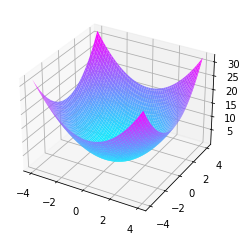

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

def f(x,y):
    return x**2 + y**2

N = 100

x = np.linspace(-4, 4, N)
y = np.linspace(-4, 4, N)

X,Y = np.meshgrid(x,y)

Z = f(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap= cm.cool)

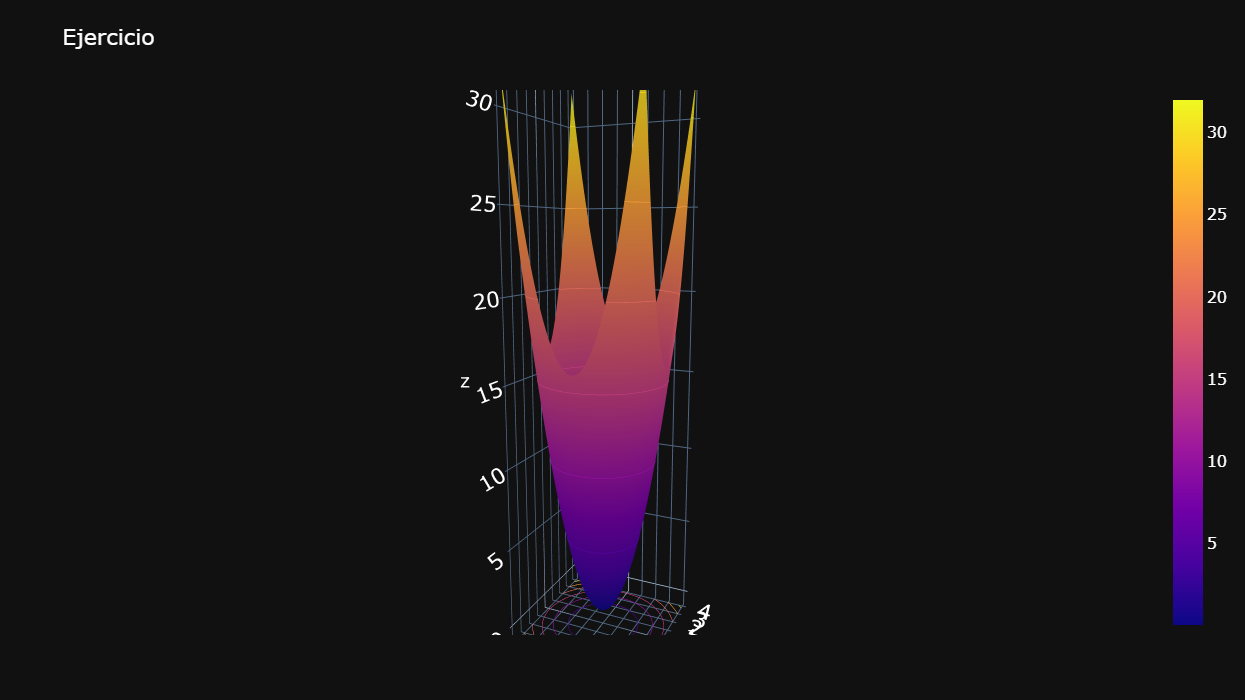

In [27]:
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.update_layout(title='Ejercicio', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90),
                  font = dict(family = 'verdana', size = 16, color = 'white'),
                  template = 'plotly_dark')

fig.show()

# Descenso del gradiente

[-0.005 -0.005]


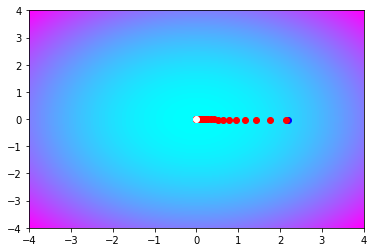

In [88]:
level_map = np.linspace(np.min(Z), np.max(Z), N)

plt.contourf(X, Y, Z, levels=level_map, cmap=cm.cool)


p = np.random.rand(2) * 8 - 4

plt.plot(p[0], p[1], 'o', c='b')

h = 0.01

lr = 0.01

def derivate(cp, p):
    return (f(cp[0], cp[1]) - f(p[0], p[1])) / h

def gradient(p):
    grad = np.zeros(2)
    for idx, val in enumerate(p):
        cp = np.copy(p)
        cp[idx] = cp[idx] + h
        
        dp = derivate(cp, p)
        grad[idx] = dp
    return grad

for i in range(100000):
    p = p - lr * gradient(p)
    if(i % 10 == 0):
        
        plt.plot(p[0], p[1], 'o', c='r')
        
plt.plot(p[0], p[1], 'o', c='w')    
print(p)